# Data Science 100 Group 008-05 Project Proposal

#### Zack Peachell, Jasper Palov, Arjun Saxena, Bhavya Dubey

\
\

## Introduction to our project: 

## Preliminary exploratory data analysis:
\
From the star dataset we have chosen!

In [28]:
# Run this cell to continue.
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

In [48]:
star_raw_data <- "https://raw.githubusercontent.com/zackpeachell/DSCI_100_group_008_05/main/6%20class%20csv.csv"
read_star <- read_csv(star_raw_data)
read_star

Rows: 240 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Star color, Spectral Class
dbl (5): Temperature (K), Luminosity(L/Lo), Radius(R/Ro), Absolute magnitude...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3068,0.0024,0.1700,16.12,0,Red,M
3042,0.0005,0.1542,16.60,0,Red,M
2600,0.0003,0.1020,18.70,0,Red,M
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8829,537493,1423,-10.73,5,White,A
9235,404940,1112,-11.23,5,White,A
37882,294903,1783,-7.80,5,Blue,O


In [49]:

#these columns need renames

name_star <- read_star|>
                rename("Star_type" = "Star type")|>
                rename("Temperature_K" = "Temperature (K)")|>
                rename("Star_color" = "Star color")|>
                rename("Spectral_Class" = "Spectral Class")|>
                rename("Luminosity_ratio" = "Luminosity(L/Lo)")|>
                rename("Radius_ratio" = "Radius(R/Ro)")|>
                rename("Absolute_magnitude_Mv" = "Absolute magnitude(Mv)")|>
                filter(Spectral_Class != "NA")|>
                mutate(Star_type = as_factor(Star_type))
name_star

set.seed(2023) #check this I think you need a specific seed

split_star <- initial_split(name_star, prop = 0.75, strata = Star_type)
train_star <- training(split_star)
test_star <- testing(split_star)
train_star

Temperature_K,Luminosity_ratio,Radius_ratio,Absolute_magnitude_Mv,Star_type,Star_color,Spectral_Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
3068,0.0024,0.1700,16.12,0,Red,M
3042,0.0005,0.1542,16.60,0,Red,M
2600,0.0003,0.1020,18.70,0,Red,M
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8829,537493,1423,-10.73,5,White,A
9235,404940,1112,-11.23,5,White,A
37882,294903,1783,-7.80,5,Blue,O


Temperature_K,Luminosity_ratio,Radius_ratio,Absolute_magnitude_Mv,Star_type,Star_color,Spectral_Class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
3068,0.0024,0.1700,16.12,0,Red,M
3042,0.0005,0.1542,16.60,0,Red,M
2600,0.0003,0.1020,18.70,0,Red,M
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8829,537493,1423,-10.73,5,White,A
9235,404940,1112,-11.23,5,White,A
37882,294903,1783,-7.80,5,Blue,O


In [50]:
#analyzing our training data
star_spectral_count <- train_star|>
                group_by(Spectral_Class)|>
                summarize(count = n())
star_spectral_count

star_type_count <- train_star|>
                    group_by(Star_type)|>
                    summarize(count = n())

star_type_count

Spectral_Class,count
<chr>,<int>
A,15
B,33
F,14
K,5
M,83
O,30


Star_type,count
<fct>,<int>
0,30
1,30
2,30
3,30
4,30
5,30


These two summarized graphs show relative amounts of each star type and spectral class. For star type, we see a completely even spread of the data, making this variable much more suitable to classify for. 

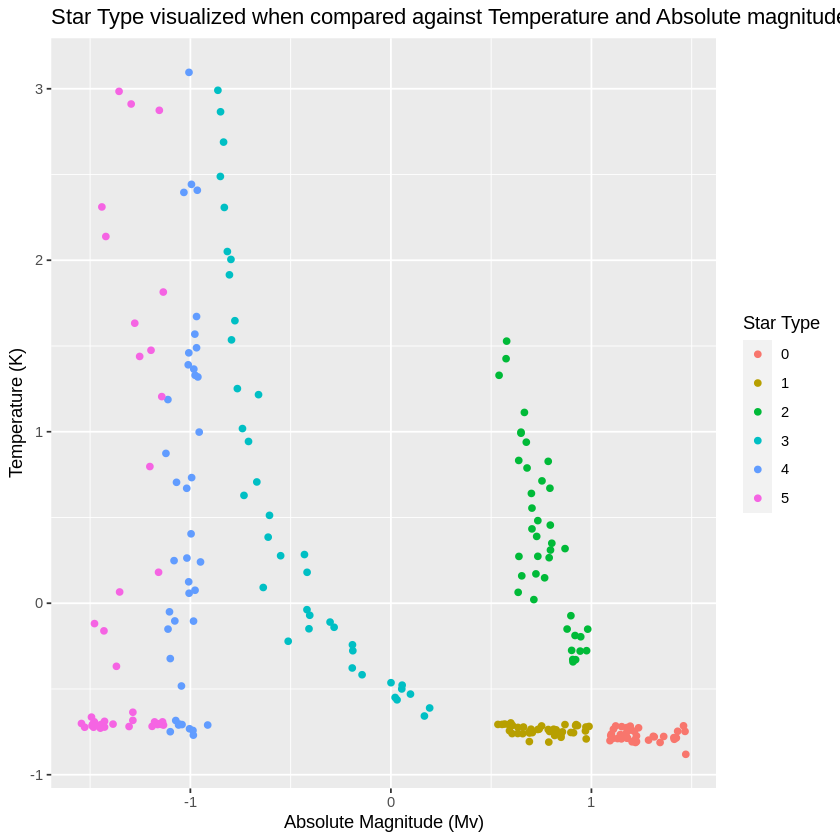

In [43]:
star_recipe <- recipe(Star_type ~ Temperature_K + Luminosity_ratio + Radius_ratio + Absolute_magnitude_Mv, data = train_star)|>
                    step_scale(all_predictors())|>
                    step_center(all_predictors())|>
                    prep()
star_scale <- bake(star_recipe, name_star)

options(repr.width.plot = 10, repr.height.plot = 10)
star_recipe_plot <- star_scale|>
                    ggplot(aes(x = Absolute_magnitude_Mv, y = Temperature_K))+
                    geom_point(aes(colour = Star_type))+
                    xlab("Absolute Magnitude (Mv)")+
                    ylab("Temperature (K)")+
                    labs(colour = "Star Type")+
                    ggtitle("Star Type visualized when compared against Temperature and Absolute magnitude")+
                    scale_fill_brewer(palette = "Set2")
star_recipe_plot

We see a grouping pattern in the data here, with similar star types having similar values, but will need more predcitors to have an accurate classifier.

## Methods

## Expected outcomes and significance